In [44]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

# Question 1:

# part 2:

In [2]:
#define image1 here
image1 = np.array([
    [141,   0  , 138, 143, 143, 143, 144],
    [141, 140, 140, 142, 142, 143, 143], 
    [140, 145, 145, 144, 142, 142, 145], 
    [141, 141, 141, 143, 142, 141, 143], 
    [139, 140, 141, 141, 142, 143, 144]
], dtype=np.uint8)

In [3]:
#code here
#first define a function for calculating histogram
#you are free to use libraries
def calc_hist(image):
    '''
    you are free to use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    # Convert the image to grayscale if necessary

    # Convert the image to uint8 data type
    image_copy = image.astype(np.uint8)

    # Calculate the histogram
    hist = cv2.calcHist([image_copy], [0], None, [256], [0, 256])

    return hist

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

Text(0.5, 1.0, 'histogram')

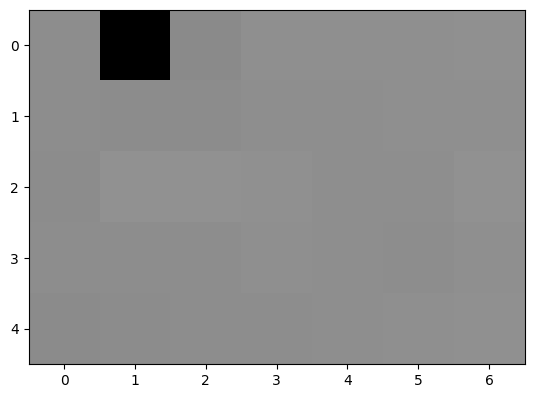

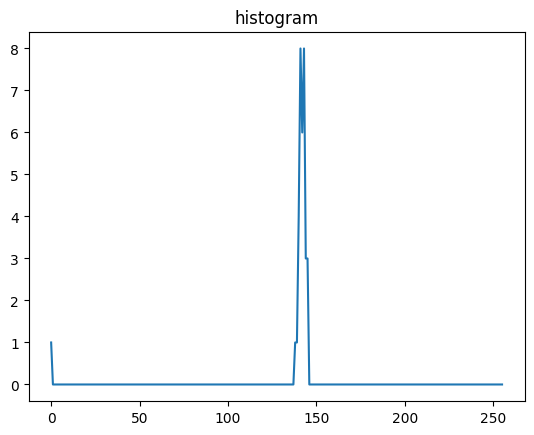

In [4]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [60]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image.
def stretch_hist(image):
  '''
    don't use libraries
    input(s):
    image (ndarray): input image
    output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()

  # Calculate the minimum and maximum pixel values
  min_val = np.min(image)
  max_val = np.max(image)

  # Perform histogram stretching using the formula
  output_image = ((image - min_val) / (max_val - min_val)) * 255
  output_image = output_image.astype(np.uint8)

  return output_image


Text(0.5, 1.0, 'stretched histogram')

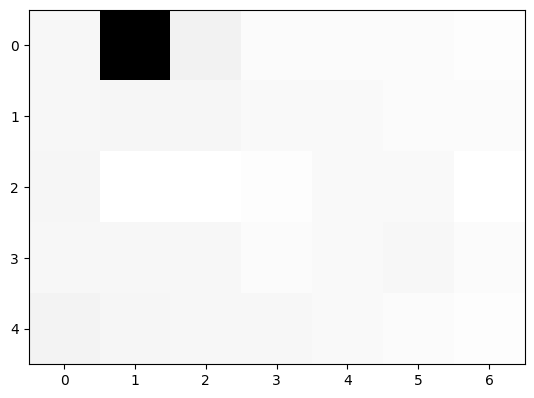

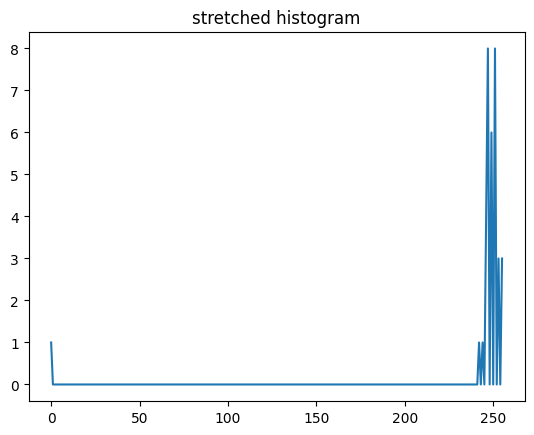

In [61]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('stretched histogram')

In [7]:
#code here
#define a function (Clip) for Clipping(input:image , output: Clipped image)

def clip_hist(image, min_value, max_value):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
    min_value : min value of the histogram which you wanna clip.
    max_value : max value of the histogram which you wanna clip.
  output(s):
    output_image (ndarray): enhanced image with histogram clipping
  '''
  output_image = image.copy()
  # Start
  # clip pixel values below min_value to min_value
  output_image[output_image < min_value] = min_value
  # clip pixel values above max_value to max_value
  output_image[output_image > max_value] = max_value
  # End
  
  return output_image


Text(0.5, 1.0, 'clipped histogram')

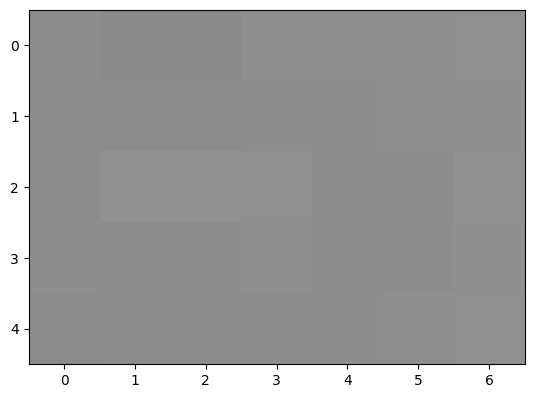

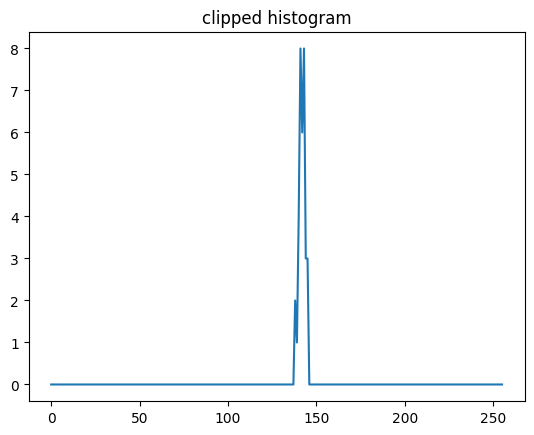

In [8]:
#dont change this cell
# image1_copy = image1.copy()
# pixels = image1_copy.reshape(-1, 1)  # reshape to a single column array
# # sort the pixel colors based on the intensity
# sorted_pixels = np.sort(pixels, axis=0)
# min_percentile = 0.01
# max_percentile = 0.99 
# min_value = sorted_pixels[int(len(sorted_pixels) * min_percentile)+1][0]
# max_value = sorted_pixels[int(len(sorted_pixels) * max_percentile)]
min_value = 138
max_value = 145
plt.imshow(clip_hist(image1, min_value, max_value),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(clip_hist(image1 ,min_value, max_value)))
plt.title('clipped histogram')

# part3


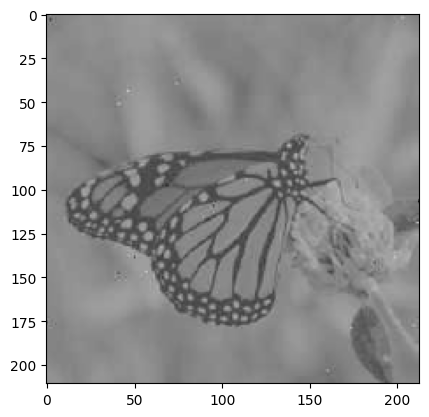

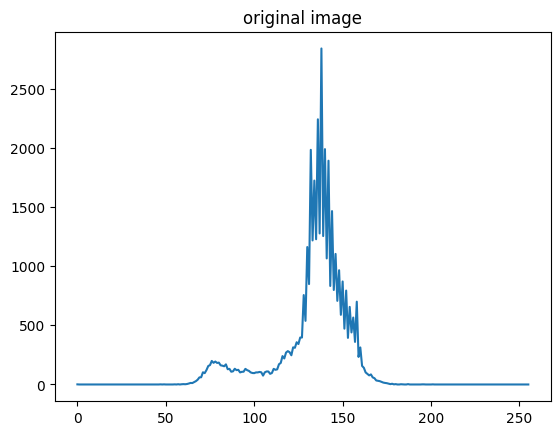

In [62]:
# first read the image and show it.(image2)
image = Image.open("image2.png")
frame = np.asarray(image, dtype = "uint8")
plt.imshow(frame ,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.title('original image')
plt.plot(calc_hist(frame))

Text(0.5, 1.0, 'stretched histogram')

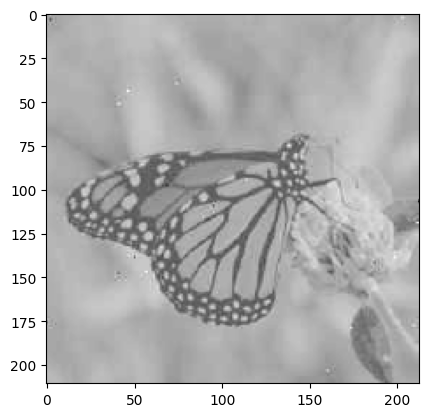

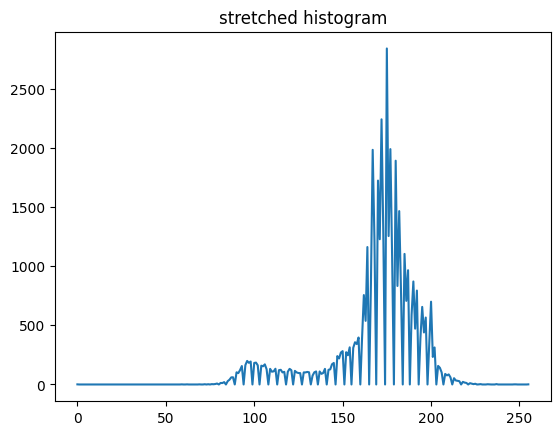

In [63]:
#use stretch_hist function to improve quality of the image and show it
plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))
plt.title('stretched histogram')

72 165


Text(0.5, 1.0, 'clipped and stretched histogram')

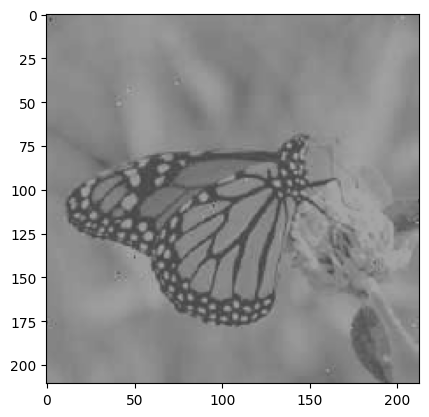

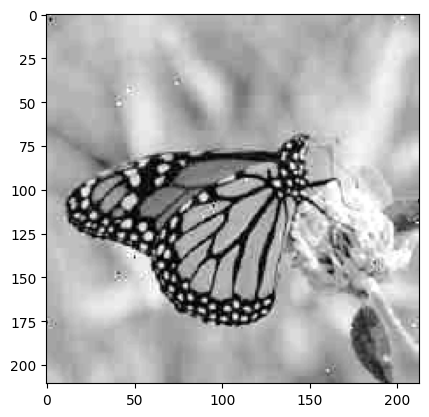

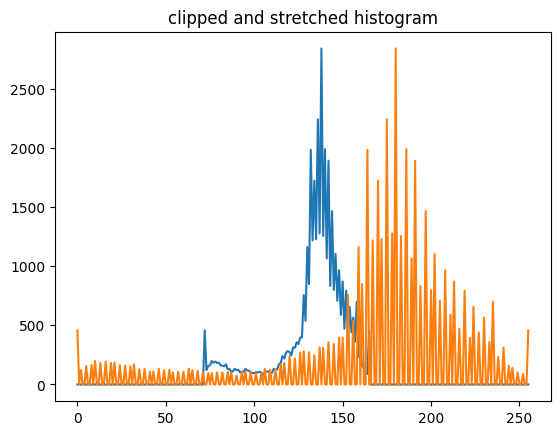

In [68]:
#use clip_hist function to improve quality of the image and show it
image2_copy = image2.copy()
pixels = image2_copy.reshape(-1, 3)
# Sort the pixel colors based on the intensity (assuming RGB image)
sorted_pixels = np.sort(pixels, axis=0)
min_value = sorted_pixels[int(len(sorted_pixels) * 0.01)+1][0]
max_value = sorted_pixels[int(len(sorted_pixels) * 0.99)][0]
print(min_value, max_value)
plt.imshow(clip_hist(image2, min_value, max_value),cmap='gray',vmin=0,vmax=255)
plt.figure("clipped image")
plt.imshow(stretch_hist(clip_hist(image2, min_value, max_value)),cmap='gray',vmin=0,vmax=255)
plt.figure("clipped and stretched image")
plt.plot(calc_hist(clip_hist(image2 ,min_value, max_value)))
plt.title('clipped histogram')
plt.plot(calc_hist(stretch_hist(clip_hist(image2 ,min_value, max_value))))
plt.title('clipped and stretched histogram')